<u><h1 style = "font-size:60px; font-family:Garamond ; font-weight : normal; color : #B7950B; text-align: center;">Prediction of Heart Strokes</h1>

<a id = '1'></a>
<h2 style = "font-family:garamond; font-size:50px; color : #B7950B; border-radius: 100px 100px; text-align:center"> 1. Introduction </h2>



<br>

Heart Strokes are a big time risk to all the people belonging from different age group to different work culture but the best part to all of it is that almost 80% of these strokes are preventable by few measures that one can do.
Here in this notebook we will go through a lot of visualizations which will help you get an idea of the same.

<h3 style = "font-family:garamond; font-size:30px; background-color: white; color : #B7950B; border-radius: 100px 100px; text-align:left">Problem Statement</h3>

Visualize the relationships between various Healthy and Unhealthy habits to Heart Strokes, and there by predict the stroke probability with best model and hypertuned parameters.
<h3 style = "font-family:garamond; font-size:30px; background-color: white; color : #B7950B; border-radius: 100px 100px; text-align:left"> Questions and Assumptions</h3>

1. Does age has impact on strokes? and How is this parameter distributed?
2. Does body mass index and glucose levels in a person, propel a heart stroke?
3. Assumption: Smoking can induce Stroke, is it true?
4. Assumption: Heart with a Heart Disease is prone to Stroke, is it true?
5. Assumption: Workload results in high blood pressure and that could lead to Stroke, is it true?
6. Assumption: Males are most susceptible to strokes due to high work related stress, is it true?
7. Relationship between continous and categorical data
8. Feature importance and Feature Selection for accurate predictions    

<h3 style = "font-family:garamond; font-size:30px; background-color: white; color : #B7950B; border-radius: 100px 100px; text-align:left"> Additional Reading Related To Problem Statement</h3>

All the assumptions are made from following articles and trying to address these points with data in this notebook

* [ Is It a Stroke or a Heart Attack?](https://www.healthline.com/health/stroke-vs-heart-attack)
* [ Heart Disease and Stroke](https://www.webmd.com/heart-disease/stroke)
* [ What is stroke?](https://www.heartandstroke.ca/stroke/what-is-stroke)
* [ Stroke after a heart attack: What’s the risk?](https://www.health.harvard.edu/heart-health/stroke-after-a-heart-attack-whats-the-risk)




Questions addressed here and can we able to understand the relationship between strokes and general 

<a id = '1.1'></a>

<h2 style = "color : #B7950B; font-size: 35px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">Libraries and Utilities</h2>

In [1]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import time

#visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from pywaffle import Waffle

%matplotlib inline
init_notebook_mode(connected= True)




#Common model helpers
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score,
                                    RandomizedSearchCV)


# dimensionality reduction
from sklearn.decomposition import PCA
import umap.umap_ as umap
import pylab as pl

# imbalance dataset handling

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)


from imblearn.over_sampling import (SMOTE,
                                    ADASYN)




# model algorithams
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import (LogisticRegression,
                                 RidgeClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


<a id = "1.2"></a>
<h1 style = "color : #B7950B; text-align:center; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px">Data Preprocessing</h1>

In this section, loading of data, visulaizing missing values and feature extraction will be carried out. 
In the current dataset, there are 11 features and one binary target. A brief information about the features are given below
1. **id**: Identification number of the individual.
2. **gender**: Gender of the individual.
3. **hypertension**: Health related parameter, does person have hypertension.
4. **heart_disease**: Health related parameter, does person have heart disease.
5. **ever_married**: Personal information, is person married on not?
6. **work_type**: Nature of work place.
7. **Residence_type**: Residence type of the individual.
8. **avg_glucose_level**: average glucose level in blood for the individual.
9. **bmi**: body mass index of the individual.
10. **smoking_status**: Habitual information. Current smoking status of individual.
11. **stroke**: Our target, is person suffered heart attack?

<h3 style = "color : #B7950B; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left">Loading data!</h3>

In [2]:
# loading data
df = pd.read_csv('Downloads\\healthcare-dataset-stroke-data.csv')
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


<h3 style = "color:#B7950B; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left">Shape of the data</h3>

In [3]:
print("Total number of rows {0} and columns are {1}".format(df.shape[0],df.shape[1]))

Total number of rows 5110 and columns are 12


<h3 style = "color:#B7950B; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left">A brief info about the data</h3>

1. It gives us the **non-null count** and **data type** correspoding to each column in the dataset
2. We can also see here that corresponding to the shape of data or **bmi** feature has some null values, futhur we will deal with the same as well

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<h3 style = "color : #B7950B; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left">Balance of data</h3>
Here we are getting the total count of data points classwise and we can clearly see that the data is quite imbalanced!

In [5]:
print("Total points for negative class label = {0} and positive class label is {1}".format(df['stroke'].value_counts()[0],df['stroke'].value_counts()[1]))

Total points for negative class label = 4861 and positive class label is 249


<h3 style = "color : #B7950B; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Statstical info about data </h3>

In [6]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [7]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


<h4 style = "color :#B7950B ; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Initial Insights About Dataset</h4> 

1. Data from bmi feature is missing.
2. Both Categorical and numerical features are present.
    - **Categorical Features**: gender, ever_married, work_type, Residence_type, smoking_status
    - **Binary Numerical Features**: hypertension,heart_disease, stroke
    - **Continous Numerical Features**: age, avg_glucose_level, bmi 
3. Most of the data is categorical which need a special attention to visualize those
4. Feature extraction can  be done by binning the continous features ( age, sugar level, and bmi) and let's keep every things as it is.

<h4 style = "color : #B7950B; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Visualization of Nullity of the Dataset</h4>

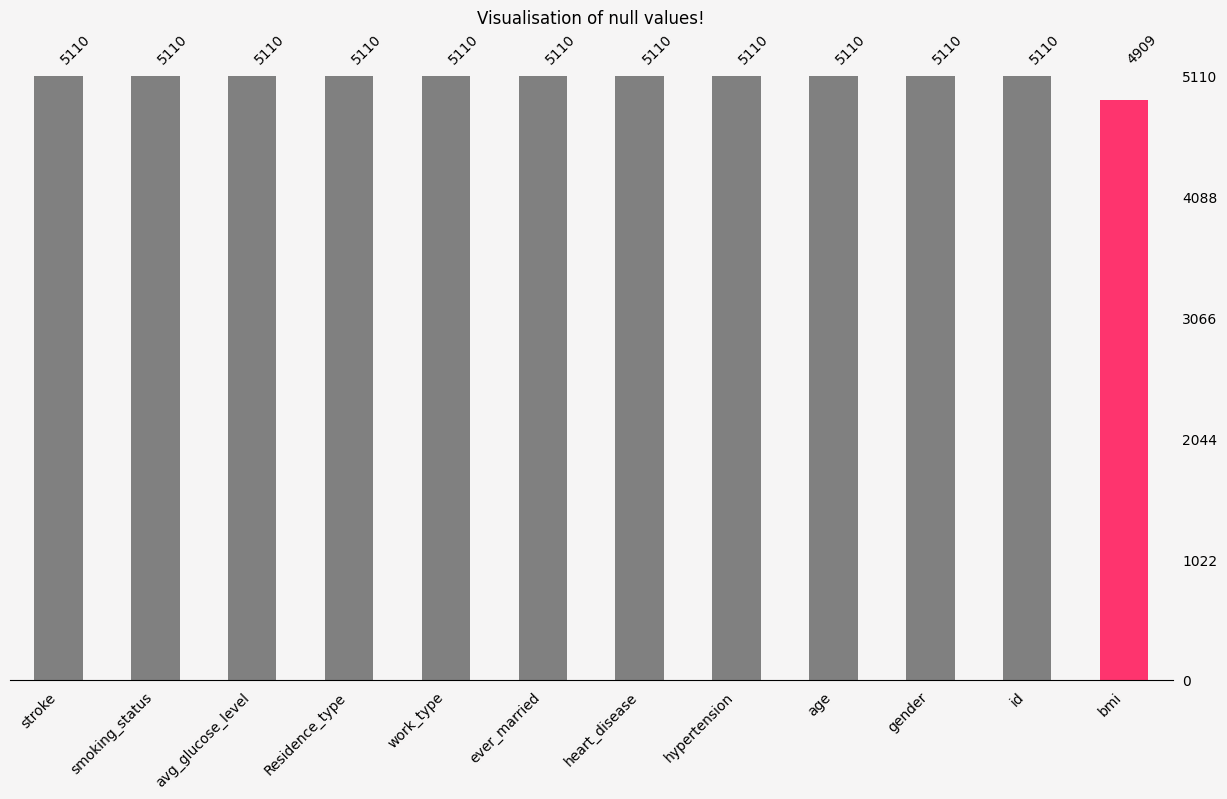

In [8]:
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','#fe346e']
fig, ax = plt.subplots(figsize = (15,8), dpi = 100)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')


msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =10,
         labels = 'off',filter = 'top')
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
plt.title("Visualisation of null values!")
fig.show()

<h3 style = "color:#B7950B; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left">Null value Imputation</h3>
Imputing the null values with median as medians are less likely to get affected by outliers

In [9]:
df['bmi'] = df['bmi'].fillna(round(df['bmi'].median(),2))
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Only bmi feature have some missing data,which was be filled with the median of the same column. For feature extraction, binning was applied for all the continous values, binning values are taken from follow articles.


* [body mass index binning](https://www.medicalnewstoday.com/articles/323446#body-mass-index)
* [Age binning](https://kidspicturedictionary.com/english-through-pictures/people-english-through-pictures/age-physical-description/)
* [average glucose binning](https://agamatrix.com/blog/normal-blood-sugar-level-chart/)

In [10]:
## binning of numerical variables
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

<h2 style = "color : #B7950B; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Data Visualization</h2>
Now we will begin our journey of data visualization and try to explain everything through visualization only in as simple code and explanation as possible

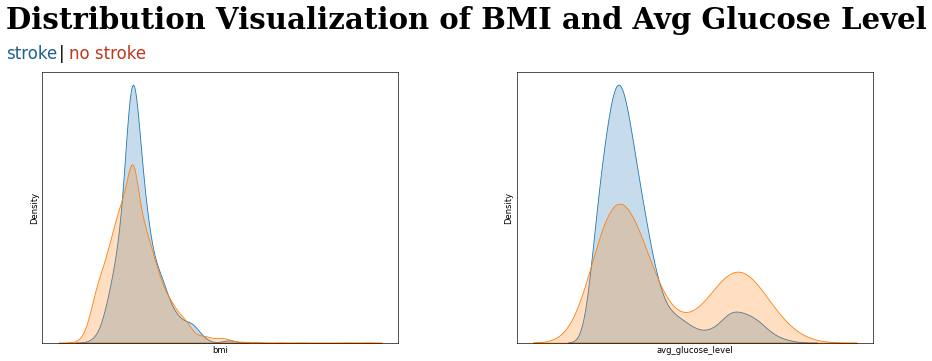

In [11]:
#image = sns.pairplot(df.drop(columns = 'id'),hue='stroke',markers=["o", "s"],corner=True)
#image.map_lower(sns.kdeplot, levels=4, color=".2")
fig = plt.figure(figsize = (24,10),dpi = 60)
gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)
ax1 = fig.add_subplot(gs[2:8,0:8])
ax2 = fig.add_subplot(gs[2:8,10:18])
sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi',shade = True, ax = ax1)
sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi', shade = True, ax = ax1)
sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level',shade = True, ax = ax2)
sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level', shade = True, ax = ax2)

ax1.set_xticks([])
ax2.set_xticks([])
ax1.set_yticks([])
ax2.set_yticks([])

fig.text(0.1,0.8,'Distribution Visualization of BMI and Avg Glucose Level',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.text(0.1,0.75,'stroke',fontsize=20,c = "#1F618D")
fig.text(0.137,0.75,'|',fontsize=20)
fig.text(0.144,0.75,'no stroke',fontsize=20,c = "#C1381B")
fig.show()

We can see both the distributions are quite skewed and that too av_glucose_level is badly skewed so will have to take care of this as well in near future

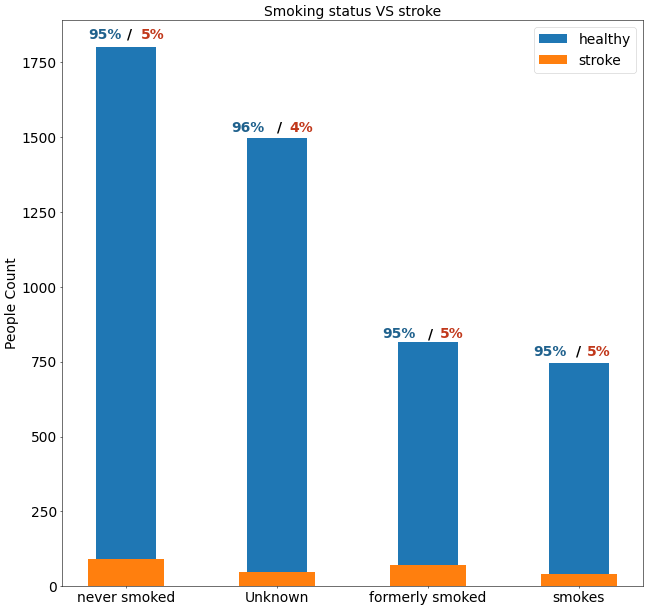

In [12]:
fig = plt.figure(figsize=(15,15), dpi = 50)
healthy_gen = df[df['stroke'] == 0].smoking_status.value_counts()
stroke_gen = df[df['stroke'] == 1].smoking_status.value_counts()

plt.bar( healthy_gen.index, height = healthy_gen.values, width = 0.4)
plt.bar( stroke_gen.index , height = stroke_gen.values, width = 0.5)
plt.legend(['healthy','stroke'], fontsize = 20)
plt.ylabel('People Count' , fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Smoking status VS stroke' , fontsize = 20)
plt.text(-0.25,1830,"{0}%".format(round((healthy_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c = "#1F618D",fontweight = "bold")
plt.text(0.01,1830,"/", fontsize=20, weight = "bold")
plt.text(0.1,1830,"{0}%".format(round((stroke_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(0.7,1520,"{0}%".format(round((healthy_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(1.0,1520,"/", fontsize=20,weight = "bold")
plt.text(1.08,1520,"{0}%".format(round((stroke_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(1.7,830,"{0}%".format(round((healthy_gen[2]/(healthy_gen[2]+stroke_gen[2]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(2.0,830,"/", fontsize=20,weight = "bold")
plt.text(2.08,830,"{0}%".format(round((stroke_gen[2]/(healthy_gen[2]+stroke_gen[2]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(2.7,770,"{0}%".format(round((healthy_gen[3]/(healthy_gen[3]+stroke_gen[3]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(2.98,770,"/", fontsize=20,weight = "bold")
plt.text(3.05,770,"{0}%".format(round((stroke_gen[3]/(healthy_gen[3]+stroke_gen[3]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")
fig.show()

Here in the plot above we can see that though graph has a decreasing trend yet if we look into the percentages we can see it doesnt really matter if a person smokes a lot or not because it can be seen that it affects kinda similar in all the cases.
We know smoking it deadly but does it affects the happening or stroke or not it is quite less.

Text(3.05, 440, '0%')

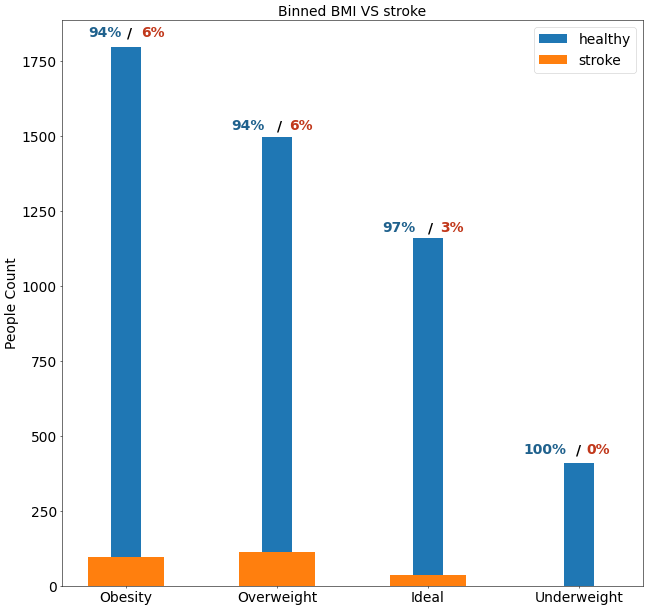

In [13]:
fig = plt.figure(figsize=(15,15), dpi = 50)
healthy_gen = df[df['stroke'] == 0].bmi_cat.value_counts()
stroke_gen = df[df['stroke'] == 1].bmi_cat.value_counts()

plt.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2)
plt.bar( stroke_gen.index , height = stroke_gen.values, width = 0.5)
plt.legend(['healthy','stroke'], fontsize = 20)
plt.ylabel('People Count')
plt.title('Binned BMI VS stroke', fontsize = 20)
plt.ylabel('People Count' , fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.text(-0.25,1830,"{0}%".format(round((healthy_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c = "#1F618D",fontweight = "bold")
plt.text(0.01,1830,"/", fontsize=20, weight = "bold")
plt.text(0.1,1830,"{0}%".format(round((stroke_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(0.7,1520,"{0}%".format(round((healthy_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(1.0,1520,"/", fontsize=20,weight = "bold")
plt.text(1.08,1520,"{0}%".format(round((stroke_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(1.7,1180,"{0}%".format(round((healthy_gen[2]/(healthy_gen[2]+stroke_gen[2]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(2.0,1180,"/", fontsize=20,weight = "bold")
plt.text(2.08,1180,"{0}%".format(round((stroke_gen[2]/(healthy_gen[2]+stroke_gen[2]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(2.63,440,"{0}%".format(round((healthy_gen[3]/(healthy_gen[3]+stroke_gen[3]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(2.98,440,"/", fontsize=20,weight = "bold")
plt.text(3.05,440,"{0}%".format(round((stroke_gen[3]/(healthy_gen[3]+stroke_gen[3]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

Here we can see as the BMI index increases the risk of getting an attack also increases.

Text(4.05, 300, '0%')

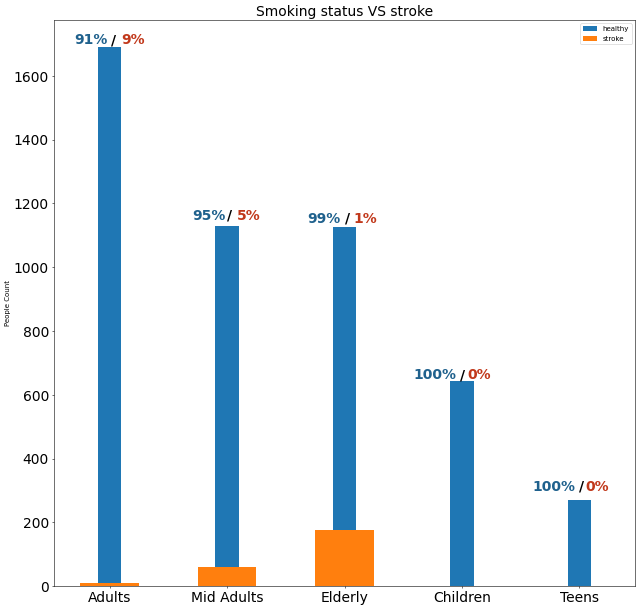

In [14]:
fig = plt.figure(figsize=(15,15), dpi = 50)
healthy_gen = df[df['stroke'] == 0].age_cat.value_counts()
stroke_gen = df[df['stroke'] == 1].age_cat.value_counts()

plt.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2)
plt.bar( stroke_gen.index , height = stroke_gen.values, width = 0.5)
plt.legend(['healthy','stroke'])
plt.ylabel('People Count')
plt.title('Binned Age VS stroke')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Smoking status VS stroke' , fontsize = 20)
plt.text(-0.3,1700,"{0}%".format(round((healthy_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c = "#1F618D",fontweight = "bold")
plt.text(0.01,1700,"/", fontsize=20, weight = "bold")
plt.text(0.1,1700,"{0}%".format(round((stroke_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(0.70,1150,"{0}%".format(round((healthy_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(1.0,1150,"/", fontsize=20,weight = "bold")
plt.text(1.08,1150,"{0}%".format(round((stroke_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(1.68,1140,"{0}%".format(round((healthy_gen[2]/(healthy_gen[2]+stroke_gen[2]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(2.0,1140,"/", fontsize=20,weight = "bold")
plt.text(2.08,1140,"{0}%".format(round((stroke_gen[2]/(healthy_gen[2]+stroke_gen[2]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(2.59,650,"{0}%".format(round((healthy_gen[3]/(healthy_gen[3]+stroke_gen[3]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(2.98,650,"/", fontsize=20,weight = "bold")
plt.text(3.05,650,"{0}%".format(round((stroke_gen[3]/(healthy_gen[3]+stroke_gen[3]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(3.6,300,"{0}%".format(round((healthy_gen[4]/(healthy_gen[4]+stroke_gen[4]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(4.0,300,"/", fontsize=20,weight = "bold")
plt.text(4.05,300,"{0}%".format(round((stroke_gen[4]/(healthy_gen[4]+stroke_gen[4]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

In the above bar plot we can see that as the age increases the chances of getting a stroke also increases.

Text(3.03, 110, '15%')

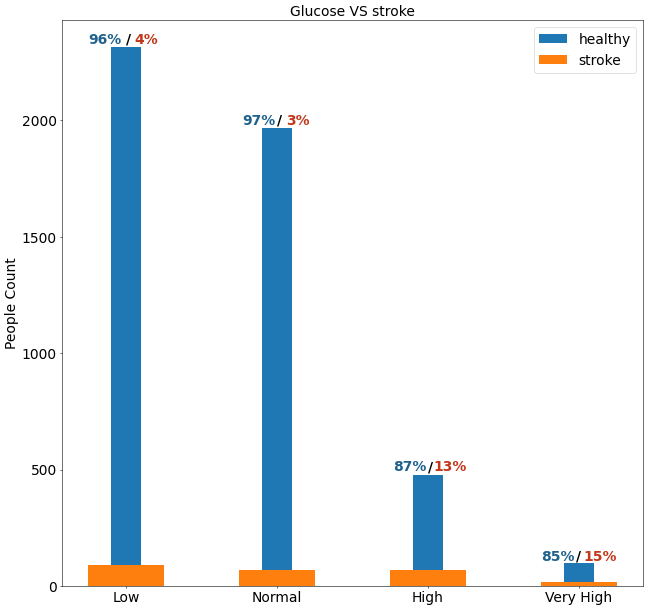

In [15]:
fig = plt.figure(figsize=(15,15), dpi = 50)
healthy_gen = df[df['stroke'] == 0].glucose_cat.value_counts()
stroke_gen = df[df['stroke'] == 1].glucose_cat.value_counts()
plt.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2)
plt.bar( stroke_gen.index , height = stroke_gen.values, width = 0.5)
plt.legend(['healthy','stroke'], fontsize = 20)
plt.ylabel('People Count', fontsize = 20)
plt.title('Glucose VS stroke' , fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize= 20)
plt.text(-0.25,2330,"{0}%".format(round((healthy_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c = "#1F618D",fontweight = "bold")
plt.text(0.0,2330,"/", fontsize=20, weight = "bold")
plt.text(0.058,2330,"{0}%".format(round((stroke_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(0.77,1982,"{0}%".format(round((healthy_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(1.0,1982,"/", fontsize=20,weight = "bold")
plt.text(1.06,1982,"{0}%".format(round((stroke_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(1.77,495,"{0}%".format(round((healthy_gen[2]/(healthy_gen[2]+stroke_gen[2]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(2.0,495,"/", fontsize=20,weight = "bold")
plt.text(2.04,495,"{0}%".format(round((stroke_gen[2]/(healthy_gen[2]+stroke_gen[2]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(2.75,110,"{0}%".format(round((healthy_gen[3]/(healthy_gen[3]+stroke_gen[3]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(2.98,110,"/", fontsize=20,weight = "bold")
plt.text(3.03,110,"{0}%".format(round((stroke_gen[3]/(healthy_gen[3]+stroke_gen[3]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

Here we can see that higher the glucose level the higher risk we are at of getting a stroke

Text(2.04, 21, '0%')

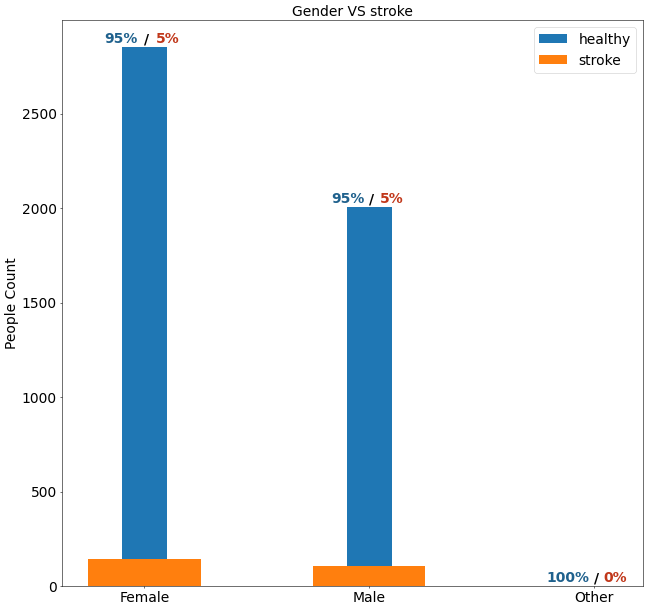

In [16]:
fig = plt.figure(figsize=(15,15), dpi = 50)
healthy_gen = df[df['stroke'] == 0].gender.value_counts()
stroke_gen = df[df['stroke'] == 1].gender.value_counts()

plt.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2)
plt.bar( stroke_gen.index , height = stroke_gen.values, width = 0.5)
plt.legend(['healthy','stroke'], fontsize = 20)
plt.ylabel('People Count', fontsize = 20)
plt.title('Gender VS stroke', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize= 20)
plt.text(-0.18,2873,"{0}%".format(round((healthy_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c = "#1F618D",fontweight = "bold")
plt.text(0.0,2873,"/", fontsize=20, weight = "bold")
plt.text(0.05,2873,"{0}%".format(round((stroke_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(0.83,2027,"{0}%".format(round((healthy_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(1.0,2027,"/", fontsize=20,weight = "bold")
plt.text(1.048,2027,"{0}%".format(round((stroke_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(1.79,21,"{0}%".format(round((healthy_gen[2]/(healthy_gen[2]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(2.0,21,"/", fontsize=20,weight = "bold")
plt.text(2.04,21,"{0}%".format(round((0/(healthy_gen[2]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

Gender doesn't really affects the probablity of a person getting a stroke or not.

Text(1.048, 1748, '2%')

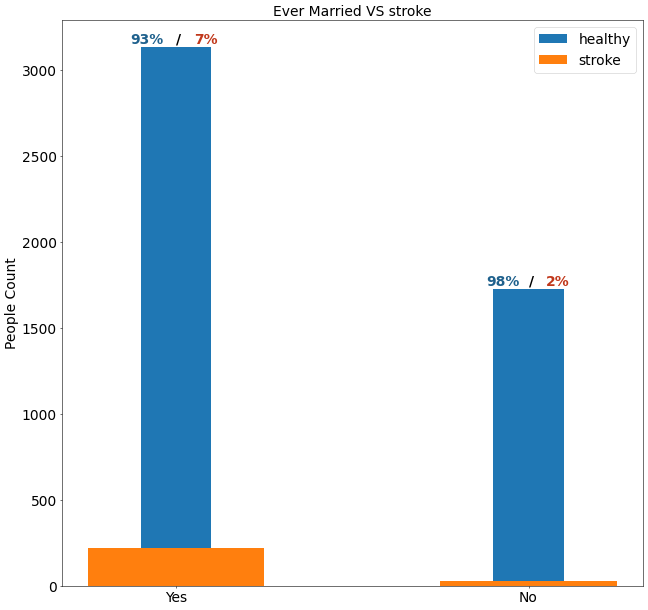

In [17]:
fig = plt.figure(figsize=(15,15), dpi = 50)
healthy_gen = df[df['stroke'] == 0].ever_married.value_counts()
stroke_gen = df[df['stroke'] == 1].ever_married.value_counts()

plt.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2)
plt.bar( stroke_gen.index , height = stroke_gen.values, width = 0.5)
plt.legend(['healthy','stroke'], fontsize = 20)
plt.ylabel('People Count', fontsize = 20)
plt.title('Ever Married VS stroke', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize= 20)
plt.text(-0.13,3153,"{0}%".format(round((healthy_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c = "#1F618D",fontweight = "bold")
plt.text(0.0,3153,"/", fontsize=20, weight = "bold")
plt.text(0.05,3153,"{0}%".format(round((stroke_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(0.88,1748,"{0}%".format(round((healthy_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(1.0,1748,"/", fontsize=20,weight = "bold")
plt.text(1.048,1748,"{0}%".format(round((stroke_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

Quite funny yet true that married people do tend to have higer probablity of getting a stroke.

Text(4.05, 44, '0%')

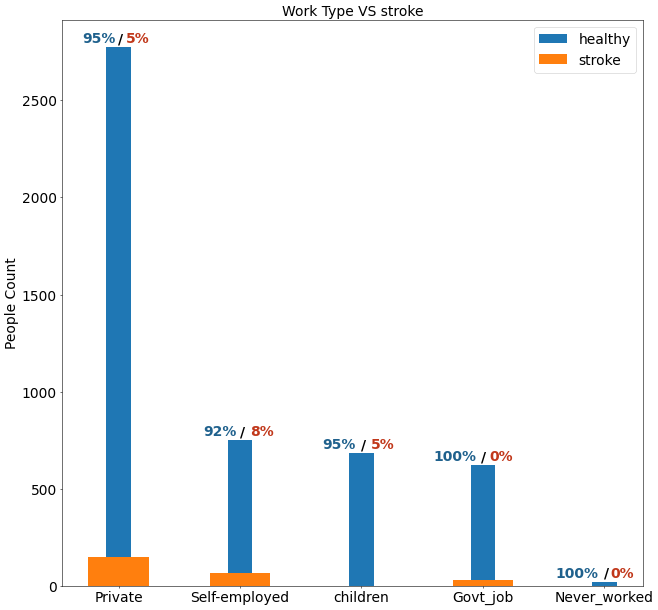

In [18]:
fig = plt.figure(figsize=(15,15), dpi = 50)

healthy_gen = df[df['stroke'] == 0].work_type.value_counts()
stroke_gen = df[df['stroke'] == 1].work_type.value_counts()

plt.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2)
plt.bar( stroke_gen.index , height = stroke_gen.values, width = 0.5)
plt.legend(['healthy','stroke'], fontsize = 20)
plt.ylabel('People Count', fontsize = 20)
plt.title('Work Type VS stroke', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize= 20)
plt.text(-0.3,2796,"{0}%".format(round((healthy_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c = "#1F618D",fontweight = "bold")
plt.text(-0.005,2796,"/", fontsize=20, weight = "bold")
plt.text(0.058,2796,"{0}%".format(round((stroke_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(0.70,774,"{0}%".format(round((healthy_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(1.0,774,"/", fontsize=20,weight = "bold")
plt.text(1.08,774,"{0}%".format(round((stroke_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(1.68,705,"{0}%".format(round((healthy_gen[2]/(healthy_gen[2]+stroke_gen[2]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(2.0,705,"/", fontsize=20,weight = "bold")
plt.text(2.08,705,"{0}%".format(round((stroke_gen[2]/(healthy_gen[2]+stroke_gen[2]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(2.59,644,"{0}%".format(round((healthy_gen[3]/(healthy_gen[3]+stroke_gen[3]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(2.98,644,"/", fontsize=20,weight = "bold")
plt.text(3.05,644,"{0}%".format(round((stroke_gen[3]/(healthy_gen[3]+stroke_gen[3]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(3.6,44,"{0}%".format(round((healthy_gen[3]/(healthy_gen[3]+stroke_gen[3]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(4.0,44,"/", fontsize=20,weight = "bold")
plt.text(4.05,44,"{0}%".format(round((stroke_gen[3]/(healthy_gen[3]+stroke_gen[3]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

Here we can see that self-employed people have higher chance of stroke we can say this as it might be the risk of losing all, or maybe puuting too much into the work might put a lot of strain in them hence the probablity of them getting a stroke is higher then all the other cases.

Text(1.048, 2420, '5%')

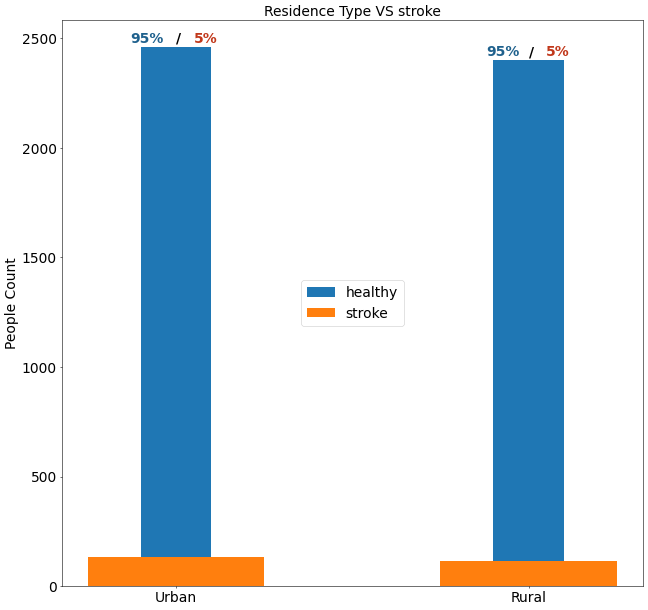

In [19]:
fig = plt.figure(figsize=(15,15), dpi = 50)

healthy_gen = df[df['stroke'] == 0].Residence_type.value_counts()
stroke_gen = df[df['stroke'] == 1].Residence_type.value_counts()

plt.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2)
plt.bar( stroke_gen.index , height = stroke_gen.values, width = 0.5)
plt.legend(['healthy','stroke'], fontsize = 20, loc = "center")
plt.ylabel('People Count', fontsize = 20)
plt.title('Residence Type VS stroke', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize= 20)
plt.text(-0.13,2481,"{0}%".format(round((healthy_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c = "#1F618D",fontweight = "bold")
plt.text(0.0,2481,"/", fontsize=20, weight = "bold")
plt.text(0.05,2481,"{0}%".format(round((stroke_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(0.88,2420,"{0}%".format(round((healthy_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(1.0,2420,"/", fontsize=20,weight = "bold")
plt.text(1.048,2420,"{0}%".format(round((stroke_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

Again it doesnt really matter if a person is living in Rural or Urban area a stroke in both the cases are quite similar.

Text(1.048, 472, '13%')

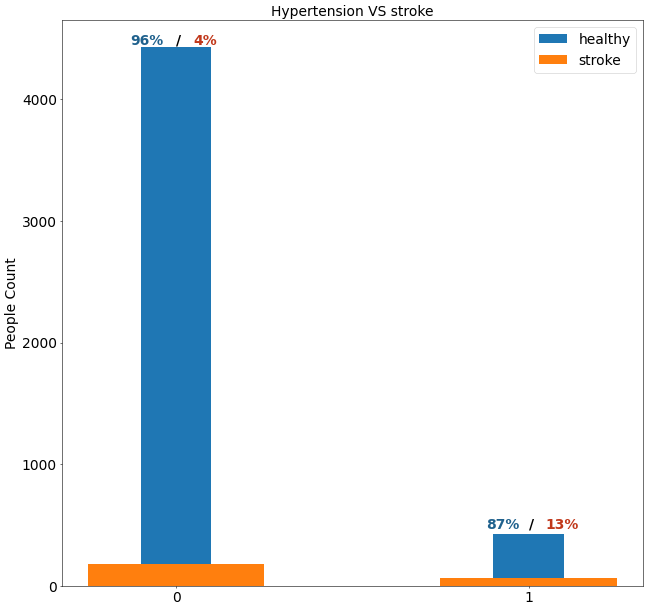

In [20]:
fig = plt.figure(figsize=(15,15), dpi = 50)

healthy_gen = df[df['stroke'] == 0].hypertension.value_counts()
stroke_gen = df[df['stroke'] == 1].hypertension.value_counts()

plt.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2)
plt.bar( stroke_gen.index , height = stroke_gen.values, width = 0.5)
plt.legend(['healthy','stroke'], fontsize = 20)
plt.ylabel('People Count', fontsize=20)
plt.title('Hypertension VS stroke',fontsize = 20)
plt.xticks([1,0], fontsize = 20)
plt.yticks(fontsize = 20)
plt.text(-0.13,4450,"{0}%".format(round((healthy_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c = "#1F618D",fontweight = "bold")
plt.text(0.0,4450,"/", fontsize=20, weight = "bold")
plt.text(0.05,4450,"{0}%".format(round((stroke_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(0.88,472,"{0}%".format(round((healthy_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(1.0,472,"/", fontsize=20,weight = "bold")
plt.text(1.048,472,"{0}%".format(round((stroke_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

So here we can see that hypertension is one of the major causes for getting a stroke maybe we can related this with the work type as self employed people has more tension then other work culture people

Text(1.048, 250, '17%')

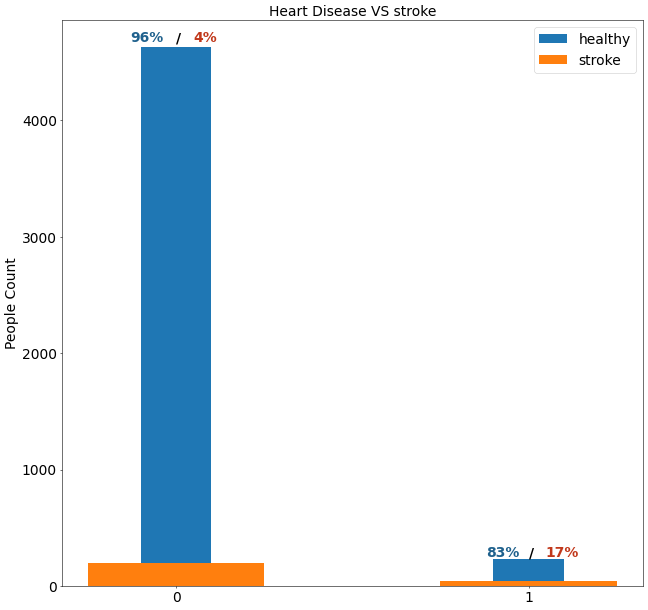

In [21]:
fig = plt.figure(figsize=(15,15), dpi = 50)

healthy_gen = df[df['stroke'] == 0].heart_disease.value_counts()
stroke_gen = df[df['stroke'] == 1].heart_disease.value_counts()

plt.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2)
plt.bar( stroke_gen.index , height = stroke_gen.values, width = 0.5)
plt.legend(['healthy','stroke'], fontsize = 20)
plt.ylabel('People Count', fontsize = 20)
plt.title('Heart Disease VS stroke', fontsize = 20)
plt.xticks([1,0], fontsize = 20)
plt.yticks(fontsize = 20)
plt.text(-0.13,4672,"{0}%".format(round((healthy_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c = "#1F618D",fontweight = "bold")
plt.text(0.0,4672,"/", fontsize=20, weight = "bold")
plt.text(0.05,4672,"{0}%".format(round((stroke_gen[0]/(healthy_gen[0]+stroke_gen[0]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

plt.text(0.88,250,"{0}%".format(round((healthy_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,color = "#1F618D",fontweight = "bold")
plt.text(1.0,250,"/", fontsize=20,weight = "bold")
plt.text(1.048,250,"{0}%".format(round((stroke_gen[1]/(healthy_gen[1]+stroke_gen[1]))*100)), fontsize=20,c="#C1381B",fontweight = "bold")

We can see here clearly and we can even understand it on our own that if a person has some kind of heart condition previously then most likely he or she is prone to get an attack.

<AxesSubplot:title={'center':'BMI VS Age w.r.t. Heart Disease'}, xlabel='age', ylabel='bmi'>

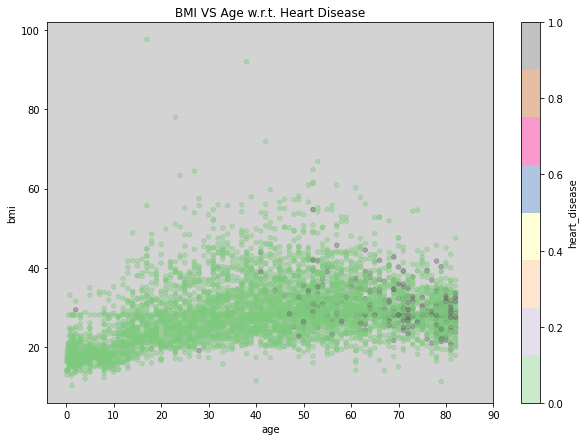

In [22]:
ax = plt.subplot(1,1,1)
ax.set_facecolor("lightgrey")
df.plot(kind="scatter", x="age", y="bmi", alpha=0.4, ax=ax, figsize=(10,7),c="heart_disease", cmap=plt.get_cmap("Accent"), colorbar=True, title="BMI VS Age w.r.t. Heart Disease", xticks=[0,10,20,30,40,50,60,70,80,90])

1. Here we can see that people who are quite older have a heart disease.
2. We can also see few outliers as between age 10 to 40 the BMI is off the charts and hence must be an outlier.
3. Also BMI is quite spread in between 0 and 40 so we can't say much from it

<AxesSubplot:title={'center':'Avg Glucose Level VS Age w.r.t. Heart Disease'}, xlabel='age', ylabel='avg_glucose_level'>

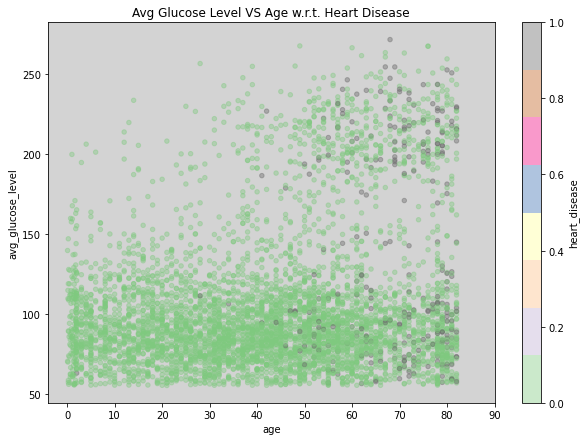

In [23]:
ax = plt.subplot(1,1,1)
ax.set_facecolor("lightgrey")
df.plot(kind="scatter", x="age", y="avg_glucose_level", alpha=0.4, ax=ax, figsize=(10,7),c="heart_disease", cmap=plt.get_cmap("Accent"), colorbar=True, title="Avg Glucose Level VS Age w.r.t. Heart Disease", xticks=[0,10,20,30,40,50,60,70,80,90])

1. Here we can see that people who are older tend to have higher and lower glucose level both at the same time, that is between 0-120 and 180-250 glucose level.
2. Only the people with age higher have a heart disease it can also be seen at higher ages it doesn't matter if they have higher glucose or not the people with heart disease is quite equally distributed.

<h1> Visualization of correlation of data</h1>

<AxesSubplot:>

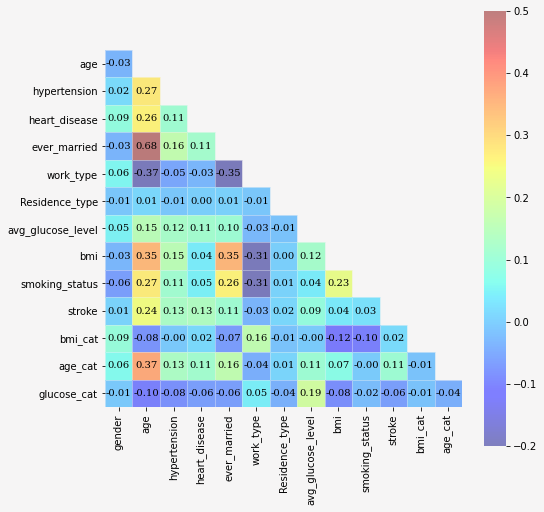

In [24]:
df_copy = df.copy()
# feature log transformations 

df_copy['age'] = df_copy['age'].apply(lambda x: np.log(x))
df_copy['avg_glucose_level'] = df_copy['avg_glucose_level'].apply(lambda x: np.log(x))
df_copy['bmi'] = df_copy['bmi'].apply(lambda x: np.log(x))



# preprocessing - label enconding and numerical value scaling
ohe = OneHotEncoder()
ss = StandardScaler()
le = LabelEncoder()

## label encoding of ordinal categorical features
for col in df_copy.columns:
    df_copy[col] = le.fit_transform(df_copy[col])
    
cols = df_copy.columns
## normalizing with standard scaler of numerical features
df_copy[cols] = ss.fit_transform(df_copy[cols])


# correlation map for all the features
df_corr = df_copy.drop(columns = ['id']).corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool),0)

fig, ax = plt.subplots(figsize = (8,8))
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",cmap = plt.get_cmap("jet"), alpha = 0.5,
           vmin=-0.2, vmax=0.5, ax = ax, cbar = True,
           linewidth = 1,linecolor = '#f6f5f5', square = True,annot_kws = {'font':'serif', 'size':10, 'color':'black'} )

The above plot is the correlation plot of all the features that tells us how all the features are correlated to each other.
The darker the color, more correlated they are.

In [25]:
le = LabelEncoder()
df_par = df.copy()
for col in df.select_dtypes(exclude = ['int64', 'float', 'float64', 'int']).columns:
    df_par[col] = le.fit_transform(df_par[col])

px.parallel_coordinates(df_par.drop(columns = ['id']), color="stroke",
                              color_continuous_scale=px.colors.diverging.Tealrose, title = 'Visualization of Multivariate Data')


This is same plot as correlation of the data, but here we have a plus that it is color codded on the basis of strokes and then the correlation is plotted hence here we can see that **residence type**, **bmi**, **avg_glucose_level** and **ssmoking status** are quite correlated with each other. Same goes for **gender**, **age** and **hypertension**

<h2 style = "font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; color : #B7950B; text-align:center">Enoding and standardizing the data for model training</h2>

In [26]:
# final data preprocessing and preperation

df_copy = df.copy()
# feature log transformations 

df['age'] = df['age'].apply(lambda x: np.log(x+10)*3)
df['avg_glucose_level'] = df['avg_glucose_level'].apply(lambda x: np.log(x+10)*2)
df['bmi'] = df['bmi'].apply(lambda x: np.log(x+10)*2)



# preprocessing - label enconding and numerical value scaling
ohe = OneHotEncoder()
ss = StandardScaler()
le = LabelEncoder()

X = df.drop(['stroke','id'], axis = 1)
y = df['stroke']

ordinal = ['age_cat',  'glucose_cat', 'bmi_cat','hypertension', 'heart_disease'] # label enconding
nominal =  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
numerical = ['age','bmi', 'avg_glucose_level'] 

## label encoding of ordinal categorical features
for col in ordinal:
    X[col] = le.fit_transform(X[col])
    
## normalizing with standard scaler of numerical features
X[numerical] = ss.fit_transform(X[numerical])

## norminal data one hot encoding for categorical features
temp = X.drop(columns = nominal)
dummies = pd.get_dummies(X[nominal])
X = pd.concat([temp,dummies], axis = 1)

1. Here we are creating dummies that is one hot encoding for all the nominal data.
2. Converting all the oridinal data.
3. We are also standardizing all the data.

In [27]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,bmi_cat,age_cat,glucose_cat,gender_Female,gender_Male,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.907774,0,1,2.352840,1.049621,1,2,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,0.757717,0,0,1.998655,-0.006996,2,2,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,1.196332,0,1,0.177339,0.566417,1,2,2,0,1,...,0,1,0,0,1,0,0,0,1,0
3,0.415263,0,0,1.523325,0.795884,1,3,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1.175665,1,0,1.570978,-0.604355,0,2,0,1,0,...,0,0,1,0,1,0,0,0,1,0


Text(1.17, 0.8, 'No stroke')

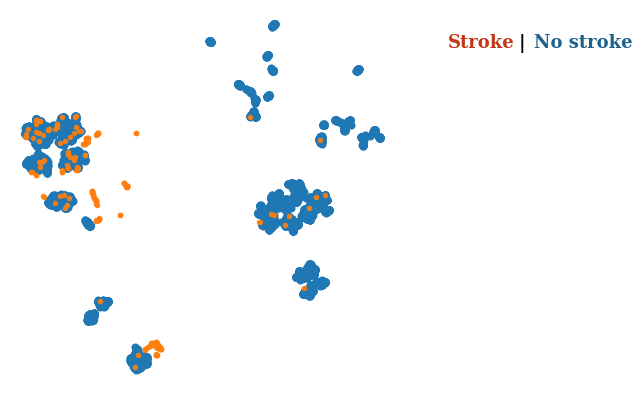

In [28]:
# Umap -  Uniform Manifold Approximation and Projection
import umap.umap_ as umap
umap = umap.UMAP(random_state=2021)
stroke_umap = umap.fit_transform(X, y)



fig = plt.figure(figsize=(7,7))# # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])

ax0.scatter(stroke_umap[df['stroke'] == 0][:,0], stroke_umap[df['stroke'] == 0][:,1], alpha=1,s=50)
ax0.scatter(stroke_umap[df['stroke'] == 1][:,0], stroke_umap[df['stroke'] == 1][:,1], alpha=0.9,s=20)
for s in ["top","right","left","bottom"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_xticks([])
ax0.set_yticks([])

fig.text(1,0.8,"Stroke", fontweight="bold", fontfamily='serif', fontsize=18, color='#C1381B')
fig.text(1.14,0.8,"|", fontweight="bold", fontfamily='serif', fontsize=18, color='black')
fig.text(1.17,0.8,"No stroke", fontweight="bold", fontfamily='serif', fontsize=18, color='#1F618D')

Here we are using UMAP which is quite similar to that of t-SNE and PCA that is its a dimenssionality reduction technique and we have use it to visualize the balance of the data here as well.


<h2 style = "font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; color : #B7950B; text-align:center">Visualization of Data Balancing with Data Sampling techniques</h2>


In [29]:
##### visualization class for dimension reduction and plotting result

class sampling():
    
    def __init__(self,feat,tar,method,ax): 
        self.feat = feat
        self.tar = tar
        self.method = method
        self.ax = ax
    
        
    # under sampling visualization

    def visualize_data(self):
        
        temp_y = pd.DataFrame({'y':self.tar})
        
        # dimension reduction
        pca = PCA(n_components= 2).fit_transform(self.feat)
        
        self.ax.set_facecolor('#f5f6f6')
        # plotting4
        self.ax.scatter(pca[temp_y['y'] == 0][:,0], pca[temp_y['y'] == 0][:,1], s = 10)
        self.ax.scatter(pca[temp_y['y'] == 1][:,0], pca[temp_y['y'] == 1][:,1], s =10)
        
        for loc in ['left','right','top', 'bottom']:
            self.ax.spines[loc].set_visible(False)
        self.ax.axes.get_xaxis().set_visible(False)
        self.ax.axes.get_yaxis().set_visible(False)
        self.ax.set_xticklabels('')
        self.ax.set_yticklabels('')
        self.ax.set_xlim(xmin = -6, xmax = 6)
        self.ax.set_ylim(ymin = -5, ymax = 6)

    
        self.ax.text(1.6,3.8,"Stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='#1F618D')
        self.ax.text(3.2,3.8,"|", fontweight="bold", fontfamily='serif', fontsize=13, color='black')
        self.ax.text(3.4,3.8,"No stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='#C1381B')
        self.ax.text(-6,5.5,self.method, {'font': 'serif', 'weight': 'bold', 'size': 20}, alpha = 0.8)
        self.ax.text(-6,4.5,'{} contain {} number of datapoint, \nand targets distribution as {}.'.format(self.method,len(self.feat), {0:Counter(self.tar)[0],1:Counter(self.tar)[1]}), {'font': 'serif', 'weight': 'normal', 'size': 12}, alpha = 0.7)
        


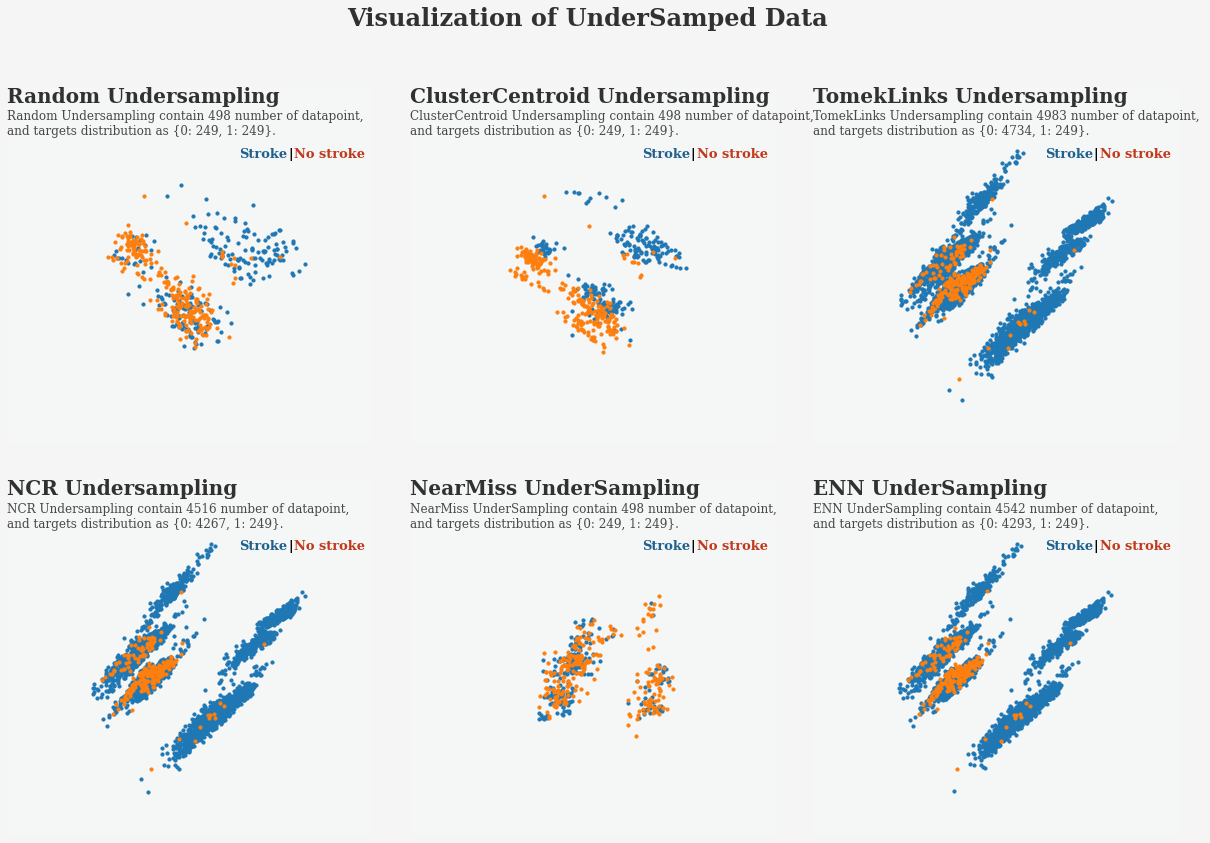

In [30]:
fig = plt.figure(figsize =(21,21))

gs = fig.add_gridspec(3,3)
gs.update(wspace = 0.1, hspace = 0.1)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])

ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])



axes = [ax1, ax2, ax3, ax4, ax5, ax6]

fig.patch.set_facecolor('#f5f5f5')

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')

        
random_state = 2021

# RandomUnderSampler
sampler = RandomUnderSampler(random_state = random_state)
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'Random Undersampling',ax=ax1).visualize_data()


# ClusterCentroids
sampler = ClusterCentroids(random_state = random_state)
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'ClusterCentroid Undersampling',ax=ax2).visualize_data()

# TomekLinks
sampler = TomekLinks()
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'TomekLinks Undersampling',ax=ax3).visualize_data()


# NeighbourhoodCleaningRule
sampler = NeighbourhoodCleaningRule()
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'NCR Undersampling',ax=ax4).visualize_data()


# NearMiss
sampler = NearMiss()
X_rs, y_rs = sampler.fit_resample(X,y.ravel())
sampling(X_rs,y_rs,'NearMiss UnderSampling',ax=ax5).visualize_data()



# EditedNearestNeighbours
sampler = EditedNearestNeighbours()
X_rs, y_rs = sampler.fit_resample(X, y)
sampling(X_rs,y_rs,'ENN UnderSampling',ax=ax6).visualize_data() 

fig.text(0.35,0.92,'Visualization of UnderSamped Data', {'font': 'serif', 'weight': 'bold', 'size': 24}, alpha = 0.8)
fig.show()

Here we are visualizing multiple under sampling techniques, that we can or we might implement in near future.

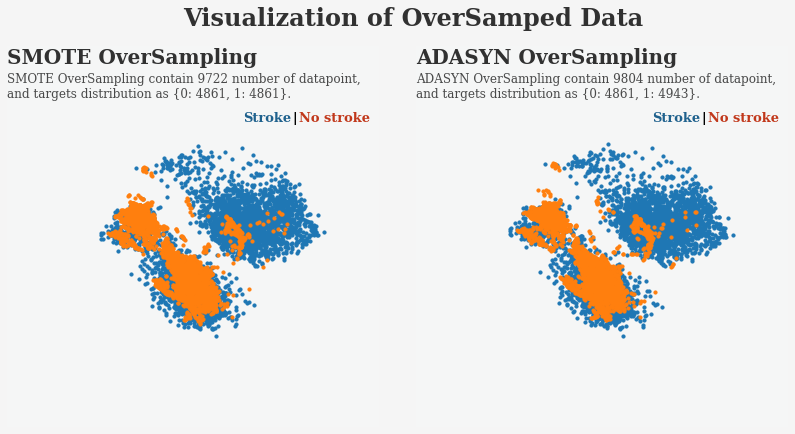

In [31]:
fig = plt.figure(figsize =(14,7))

gs = fig.add_gridspec(1,2)
gs.update(wspace = 0.1, hspace = 0.1)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])


axes = [ax1, ax2]

fig.patch.set_facecolor('#f5f5f5')

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')

        
random_state = 2021


# SMOTESampler
sampler = SMOTE()
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'SMOTE OverSampling',ax=ax1).visualize_data() 


# ADASYNSampler
sampler = ADASYN()
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'ADASYN OverSampling',ax=ax2).visualize_data()

fig.text(0.3,0.92,'Visualization of OverSamped Data', {'font': 'serif', 'weight': 'bold', 'size': 24}, alpha = 0.8)
fig.show()



Here we are visualizing the over sampling techniques.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle = True, random_state = 2021)
smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X_train, y_train.ravel())

Here we are using SMOTE that is an over sampling method for few certain reasons:
1. Our dataset is quite imbalanced and that is the positive class label are quite less compared to the negative class label.
2. If we would have under sampled then we would lost quite a few data points from the negative class label and we don't want that.
3. Our dataset in total has only about 5100 data points considering this fact we need every bit of data to train our model, only if we had quite anumber of points like 10000 to 100000 or maybe more we could have maybe opted for the under sampling method.

<h2 style = "font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; color : #B7950B; text-align:center">Hyperparameter tuning, Model building and metric visualization.</h2>

In [33]:
def multi_classifier_cv(original_data, balanced_data = None, random_state = 100, cv = 3, return_train_score = True,
                     cross_validate = False, top = 3):
    import random
    from tqdm import tqdm
    original_data_cv_result = {}
    balanced_data_cv_result = {}
    original_data_best_params = {}
    balanced_data_best_params = {}
    
    #Hyper Parameters that we are gonna use to tune our model
    param_distribution = {
        'SVC':{'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6), 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale']},
        'LogisticReg':{'solver':['newton-cg', 'lbfgs', 'liblinear'],'C':[100, 10, 1.0, 0.1, 0.01],
                       'penalty':['l1','l2','elasticnet']},
        'RidgeClassifier':{'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
        'RandomForestClassifier':{'criterion':['gini', 'entropy'],'n_estimators':[x for x in range(100,500,50)]},
        'DecisionTreeClassifer':{'criterion':['gini', 'entropy'],'splitter':['best','random']},
        'GBDTClassifer':{'loss':['deviance','exponential'],'learning_rate':[0.001,0.01,0.1,1.0,10,100],
                         'n_estimators':[x for x in range(100,500,50)]},
        'XGBClassifier':{'eval_metric':['logloss','auc'],'n_estimators':[x for x in range(100,500,50)],
                         'learning_rate':[0.001,0.01,0.1,1.0,10,100],'booster':['gbtree','gblinear','dart']}
    }
    #classifiers list 
    classifiers = {}
    classifiers['SVC'] = SVC(random_state=random_state, probability = True)
    classifiers['LogisticReg'] = LogisticRegression(random_state = random_state)
    classifiers['RidgeClassifier'] = RidgeClassifier(random_state = random_state)
    classifiers['RandomForestClassifier'] = RandomForestClassifier(random_state=random_state)
    classifiers['DecisionTreeClassifer'] = DecisionTreeClassifier(random_state=random_state)
    classifiers['GBDTClassifer'] = GradientBoostingClassifier(random_state=random_state)
    classifiers['XGBClassifier'] = XGBClassifier(random_state = random_state)
    if cross_validate:
        for model_name in tqdm(classifiers):
            clf = RandomizedSearchCV(classifiers[model_name], param_distribution[model_name], cv=cv, return_train_score=return_train_score)
            clf.fit(original_data[0],original_data[1])
            original_data_cv_result[model_name] = clf.cv_results_
            original_data_best_params[model_name] = clf.best_params_
        print("Starting cross validation for balanced Dataset")
        for model_name in tqdm(classifiers):
            clf = RandomizedSearchCV(classifiers[model_name], param_distribution[model_name], cv=cv, return_train_score=return_train_score)
            clf.fit(balanced_data[0],balanced_data[1])
            balanced_data_cv_result[model_name] = clf.cv_results_
            balanced_data_best_params[model_name] = clf.best_params_
        result = {
            'original_data_cv_result':original_data_cv_result,
            'original_data_best_params':original_data_best_params,
            'balanced_data_cv_result':balanced_data_cv_result,
            'balanced_data_best_params':balanced_data_best_params
        }
        
        return result
    
    return False
    
result = multi_classifier_cv([X_train,y_train], [X_resample,y_resample], cross_validate= True)

100%|██████████| 7/7 [17:22<00:00, 148.86s/it]  


Starting cross validation for balanced Dataset


100%|██████████| 7/7 [04:25<00:00, 37.94s/it]


The above function has multiple models in it to which we are using Random searchCV to get the best parameters for all the models.

In [34]:
import random
from tqdm import tqdm
from sklearn.utils.extmath import softmax
def predict_proba_ridge(clf, X):
    #this function is used in Ridge Classifier to get the prediction probablities
    #as it doesnt has the predict_proba method built-in in it.
    d = clf.decision_function(X)
    d_2d = np.c_[-d, d]
    return softmax(d_2d)

def multi_classifier(original_data, test_data, results, balanced_data = None, random_state = 100):
    
    modelwise_metric_original_data ={}
    modelwise_metric_balanced_data ={}
    params = [results['original_data_best_params'], results['balanced_data_best_params']]
    classifier = {}
    itr = 'original'
    for param in params:
        classifier['SVC'] = SVC(random_state=random_state, probability = True,
                                 kernel = param['SVC']['kernel'], gamma = param['SVC']['gamma'], C = param['SVC']['C'])
        classifier['LogisticReg'] = LogisticRegression(random_state = random_state, solver = param['LogisticReg']['solver'],
                                                       penalty = param['LogisticReg']['penalty'], C = param['LogisticReg']['C'])
        classifier['RidgeClassifier'] = RidgeClassifier(random_state = random_state,
                                                       alpha = param['RidgeClassifier']['alpha'])
        classifier['RandomForestClassifier'] = RandomForestClassifier(random_state=random_state,
                                                                     n_estimators = param['RandomForestClassifier']['n_estimators'],
                                                                     criterion = param['RandomForestClassifier']['criterion'])
        classifier['DecisionTreeClassifer'] = DecisionTreeClassifier(random_state=random_state,
                                                                    splitter = param['DecisionTreeClassifer']['splitter'],
                                                                    criterion = param['DecisionTreeClassifer']['criterion'])
        classifier['GBDTClassifer'] = GradientBoostingClassifier(random_state=random_state,
                                                                n_estimators = param['GBDTClassifer']['n_estimators'],
                                                                loss = param['GBDTClassifer']['loss'],
                                                                learning_rate = param['GBDTClassifer']['learning_rate'])
        classifier['XGBClassifier'] = XGBClassifier(random_state = random_state,
                                                   n_estimators = param['XGBClassifier']['n_estimators'],
                                                   learning_rate = param['XGBClassifier']['learning_rate'],
                                                   eval_metric = param['XGBClassifier']['eval_metric'],
                                                   booster = param['XGBClassifier']['booster'])
        while itr == 'original':
            for model_name in tqdm(classifier):
                classifier[model_name].fit(original_data[0],original_data[1])
                y_preds = classifier[model_name].predict(test_data[0])
                if model_name != 'RidgeClassifier':
                    y_probs = classifier[model_name].predict_proba(test_data[0])
                    auc =  (round (roc_auc_score(test_data[1],y_probs[:,1]), 2))*100
                else:
                    y_probs = predict_proba_ridge(classifier[model_name],test_data[0])
                    auc =  (round (roc_auc_score(test_data[1],y_probs[:,1]), 2))*100
                accuracy = (round(accuracy_score(test_data[1],y_preds),2))*100
                precision = (round(precision_score(test_data[1],y_preds),2))*100
                recall =  (round(recall_score(test_data[1],y_preds),2))*100
                f1 =  (round(f1_score(test_data[1],y_preds),2))*100
                conf_mat =  confusion_matrix(test_data[1],y_preds)
                modelwise_metric_original_data[model_name] = {
                    'accuracy':accuracy,
                    'precision':precision,
                    'recall':recall,
                    'f1' : f1,
                    'auc':auc,
                    'conf_mat':conf_mat
                }
            itr = 'stop'
        while itr == 'balanced':
            print("Balanced data metrics calculation starting!")
            for model_name in tqdm(classifier):
                    classifier[model_name].fit(original_data[0],original_data[1])
                    y_preds = classifier[model_name].predict(test_data[0])
                    if model_name != 'RidgeClassifier':
                        y_probs = classifier[model_name].predict_proba(test_data[0])
                        auc =  (round (roc_auc_score(test_data[1],y_probs[:,1]), 2))*100
                    else:
                        y_probs = predict_proba_ridge(classifier[model_name],test_data[0])
                        auc =  (round (roc_auc_score(test_data[1],y_probs[:,1]), 2))*100
                    accuracy = round(accuracy_score(test_data[1],y_preds),2)*100
                    precision = (round(precision_score(test_data[1],y_preds),2))*100
                    recall = (round(recall_score(test_data[1],y_preds),2))*100
                    f1 = (round(f1_score(test_data[1],y_preds),2))*100
                    conf_mat = confusion_matrix(test_data[1],y_preds)
                    modelwise_metric_balanced_data[model_name] = {
                        'accuracy':accuracy,
                        'precision':precision,
                        'recall':recall,
                        'f1' : f1,
                        'auc':auc,
                        'conf_mat':conf_mat
                    }
            itr = 'stop'
        itr = 'balanced'
    result = {
        'original_metric': modelwise_metric_original_data,
        'balanced_metric': modelwise_metric_balanced_data
    }
    return result

In [35]:
metrics = multi_classifier([X_train,y_train], [X_test, y_test], result, [X_resample,y_resample])

100%|██████████| 7/7 [00:03<00:00,  2.20it/s]


Balanced data metrics calculation starting!


100%|██████████| 7/7 [00:08<00:00,  1.26s/it]


This function takes the best parameters and the uses it to train our model on both original and balanced dataset.

In [36]:
def multi_visualize(data, vmin = -0.5, vmax = 1):
    fig = plt.figure(figsize =(24,24), dpi = 100)
    gs = fig.add_gridspec(8,6)
    gs.update(wspace = 0.2, hspace = 0.1)
       
    ax1 = fig.add_subplot(gs[1,0])
    ax2 = fig.add_subplot(gs[1,1])
    
    ax3 = fig.add_subplot(gs[2,0])
    ax4 = fig.add_subplot(gs[2,1])
    
    ax5 = fig.add_subplot(gs[3,0])
    ax6 = fig.add_subplot(gs[3,1])
    
    ax7 = fig.add_subplot(gs[4,0])
    
    ax9 = fig.add_subplot(gs[1,2])
    ax10 = fig.add_subplot(gs[1,3])
    
    ax11 = fig.add_subplot(gs[2,2])
    ax12 = fig.add_subplot(gs[2,3])
    
    ax13 = fig.add_subplot(gs[3,2])
    ax14 = fig.add_subplot(gs[3,3])
    
    ax15 = fig.add_subplot(gs[4,2])
    
    
    axes1 = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
    axes2 = [ax9, ax10, ax11, ax12, ax13, ax14, ax15]
    
    axes = [axes1,axes2]
    
    fig.patch.set_facecolor('#f6f5f5')
    
    # setting of axes; visibility of axes and spines turn off
    for ax_list in axes:
        for ax in ax_list:
            ax.axes.get_yaxis().set_visible(False)
            ax.axes.get_xaxis().set_visible(False)
            ax.set_facecolor('#f6f5f5')

    colors = ['#512b58','#fe346e']
    colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
    
    
    for ax_list in axes:
        
        if ax_list == axes1:
            res_df = data['original_metric']
        else:
            res_df = data['balanced_metric']
        
        
        alg = res_df.keys()
        n=0
        for algorithm in alg:
            cf = res_df[algorithm]['conf_mat']
            auc = res_df[algorithm]['auc']
            f1 = res_df[algorithm]['f1']
            forig = data['original_metric'][algorithm]['f1']
            fresam = data['balanced_metric'][algorithm]['f1']
            
            labels = ['True Neg','False Pos','False Neg','True Pos']
            counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
            percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
            
            #### final annotations
            label = (np.array([f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(labels,counts,percentages)])).reshape(2,2)
            
            #### heatmap
            sns.heatmap(data = cf, vmin = vmin, vmax =vmax, cmap = ['grey'],linewidth=2,linecolor = '#f6f5f5',
               ax = ax_list[n], annot = label, fmt ='', cbar = False, annot_kws = {'font':'serif','size':10, 'color':'white','weight':'bold'}, alpha =0.8)
            #### subtitle
            if ax_list == axes1:
                ax_list[n].text(0,-0,'{}'.format(algorithm),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
            else:
                ax_list[n].text(0,-0,'SMOTE {}'.format(algorithm),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
           
        
            #### Auc and F1 score plotting
            
            if ax_list == axes2:
                if (fresam > forig) & (auc > 75):
                    ax_list[n].scatter( 1 , 1 , s = 3500, c = '#fe346e')
                    ax_list[n].text(0.75,1.1, ' F1: {}\nAUC: {}'.format(int(round(f1,1)), int(round(auc,1))),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
                else:
                    ax_list[n].scatter( 1 , 1 , s = 3500, c = 'white')
                    ax_list[n].text(0.75,1.1, ' F1: {}\nAUC: {}'.format(int(round(f1,1)), int(round(auc,1))),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
               
            else:
                if (forig > 5 ) & (auc > 75):
                    ax_list[n].scatter( 1 , 1 , s = 3500, c = '#512b58', alpha = 0.9)
                    ax_list[n].text(0.75,1.1, ' F1: {}\nAUC: {}'.format(int(round(f1,1)), int(round(auc,1))),{'font':'serif','size':12, 'color':'white', 'weight':'bold'})
                else:
                    ax_list[n].scatter( 1 , 1 , s = 3500, c = 'white')
                    ax_list[n].text(0.75,1.1, ' F1: {}\nAUC: {}'.format(int(round(f1,1)), int(round(auc,1))),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
            n+=1
        if ax_list == axes1:
            ax1.text(0,-0.55,'Visualization using Original Data',{'font':'serif','size':20, 'color':'black', 'weight':'bold'},)
        else:
            ax9.text(0,-0.55,'Visualization using Oversampled Data',{'font':'serif','size':20, 'color':'black', 'weight':'bold'}, alpha = 0.9)
            
            
    fig.show()            

The above function utilizes the power of visualization and we plot the confusion metrics , AUC and the F1 score for every model with respect to the original and balanced data.

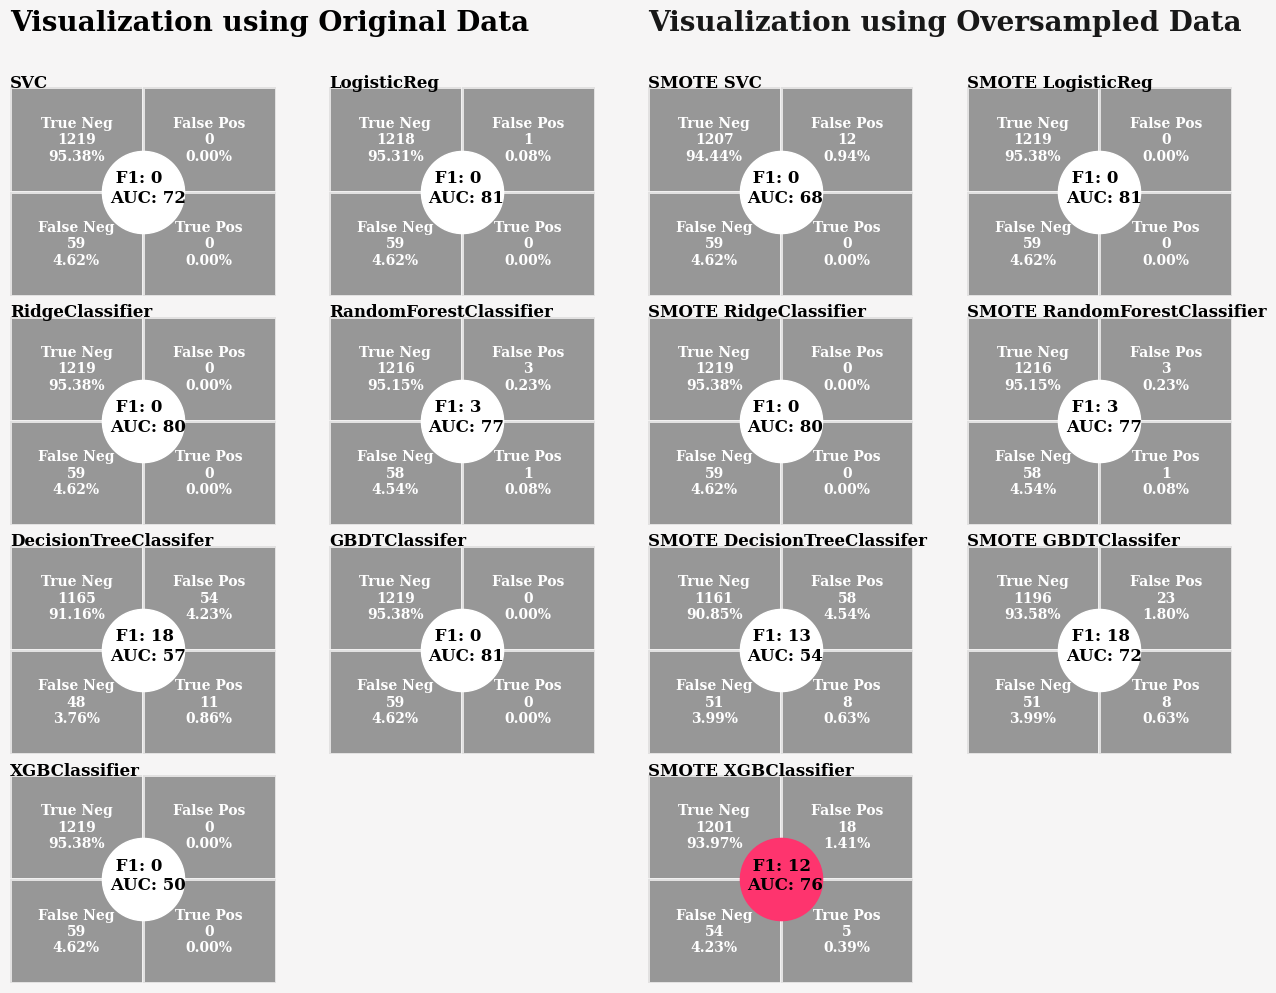

In [37]:
multi_visualize(metrics,vmin=-0.5,vmax=1)

From the visulaization it is clear that oversampling data is having better predictions scores than original data.
# Summary 
1. loaded few modules and initial cleaning of data
2. Visulaization of few relationships bewteen variables and individual variables.
3. feature correaltion visualization
4. balancing of data and visualization
5. implemented few models and visualized the results.
**Thanks for reading!!!**

<h2 style = "font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; color : #B7950B; text-align:left">References</h2>

* [1.About Stroke](https://www.heartandstroke.ca/stroke/what-is-stroke)
* [2.Handling inbalanced data](https://github.com/ChrisKuoColumbiaU/FraudDetection/blob/master/05_Sampling_techniques_for_extremely_imbalanced_data.ipynb)
* [3. TOP 50 visualization techniques](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)
* [4.handling imbalanced datasets in machinelearning](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28)
* [5.Visualization notebook ](https://www.kaggle.com/joshuaswords/awesome-hr-data-visualization-prediction)
* [6.Beautify Jupyter notebook](https://www.kaggle.com/shubhamksingh/create-beautiful-notebooks-formatting-tutorial)
* [7.Best Resource for metrics in unbalanced data](https://www.ritchieng.com/machine-learning-evaluate-classification-model/)
* [8.How to make clean visualizations](https://www.kaggle.com/gaetanlopez/how-to-make-clean-visualizations)
* [9.Heart Stroke Dataset Kaggle notebook](https://www.kaggle.com/bhuvanchennoju/data-storytelling-auc-focus-on-strokes)

<h2 style = "font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; color : #B7950B; text-align:left">Credits</h2>

Would really like to thank, [@Nikhil M](https://www.linkedin.com/in/nikhil-m-67259b171/) for letting me know about the dataset and the notebook by **Bhuvan Chennoju** and [@Bhuvan Chennoju](https://www.linkedin.com/in/bhuvanchennoju/) for the amazing notebook which has helped me to get more insights about how to tackle data and different technique to visualize the data.